In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/Users/lalebaksi/anaconda3/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
movies_data=pd.read_csv('/Users/lalebaksi/Desktop/1-MSc in DATA SCIENCE/INM433_Visual Analytics/Group coursework/cars_dataset.csv')
#movies_data.head()
movies_data.isnull().sum()

Title                        1
US_Gross                     7
Worldwide_Gross              7
US_DVD_Sales              2637
Production_Budget            1
Release_Date                 0
MPAA_Rating                605
Running_Time_min          1992
Distributor                232
Source                     365
Major_Genre                275
Creative_Type              446
Director                  1331
Rotten_Tomatoes_Rating     880
IMDB_Rating                213
IMDB_Votes                 213
dtype: int64

/var/folders/gh/tx1mhxb93m56yvmy9qknq1wr0000gn/T/ipykernel_62278/593879157.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Major_Genre', y='Worldwide_Gross', data=genre_sales, palette='Set2')


<function matplotlib.pyplot.show(close=None, block=None)>

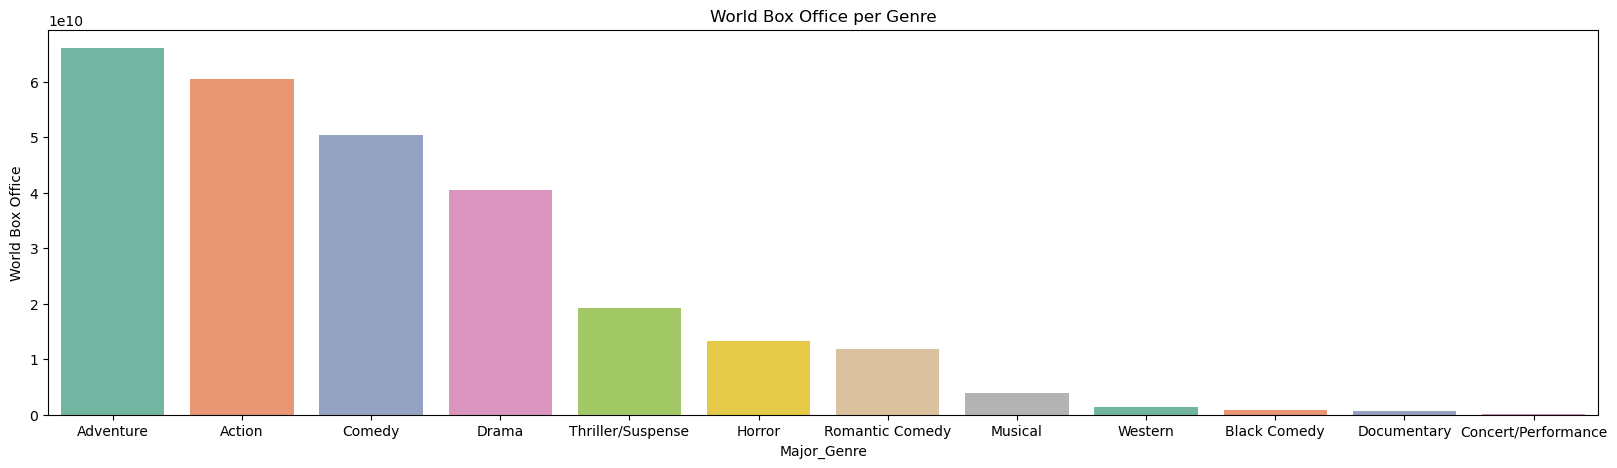

In [4]:
#plot to show the World Box Office acc to major genre types

genre_sales=movies_data.groupby('Major_Genre')['Worldwide_Gross'].sum().reset_index()
genre_sales=genre_sales.sort_values(by='Worldwide_Gross', ascending=False)
plt.figure(figsize=(20,5))
sns.barplot(x='Major_Genre', y='Worldwide_Gross', data=genre_sales, palette='Set2')
plt.title('World Box Office per Genre')
plt.xlabel('Major_Genre')
plt.ylabel('World Box Office')
plt.show

/var/folders/gh/tx1mhxb93m56yvmy9qknq1wr0000gn/T/ipykernel_62278/1859768971.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Major_Genre', y='Production_Budget', data=genre_budget, palette='Set2')


<function matplotlib.pyplot.show(close=None, block=None)>

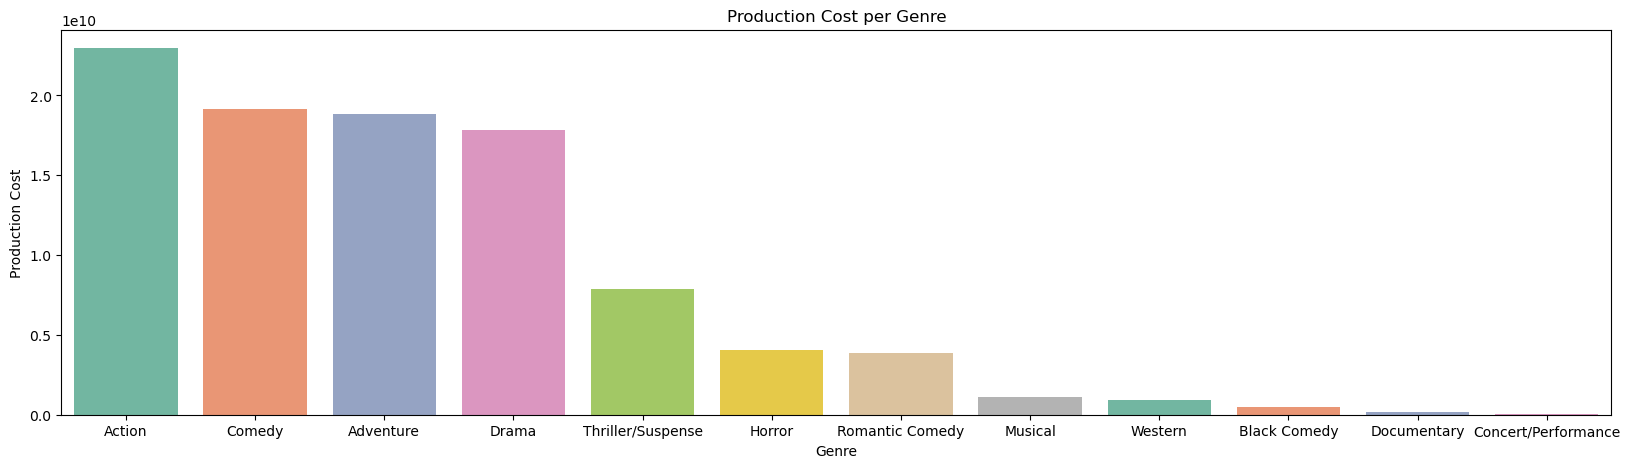

In [5]:
#plot to show the Production Budget acc to major genre types

genre_budget=movies_data.groupby('Major_Genre')['Production_Budget'].sum().reset_index()
genre_budget=genre_budget.sort_values(by='Production_Budget', ascending=False)
plt.figure(figsize=(20,5))
sns.barplot(x='Major_Genre', y='Production_Budget', data=genre_budget, palette='Set2')
plt.title('Production Cost per Genre')
plt.xlabel('Genre')
plt.ylabel('Production Cost')
plt.show

/var/folders/gh/tx1mhxb93m56yvmy9qknq1wr0000gn/T/ipykernel_62278/1683193406.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Distributor', y='Worldwide_Gross', data=dist_sales, palette='Set2')


<function matplotlib.pyplot.show(close=None, block=None)>

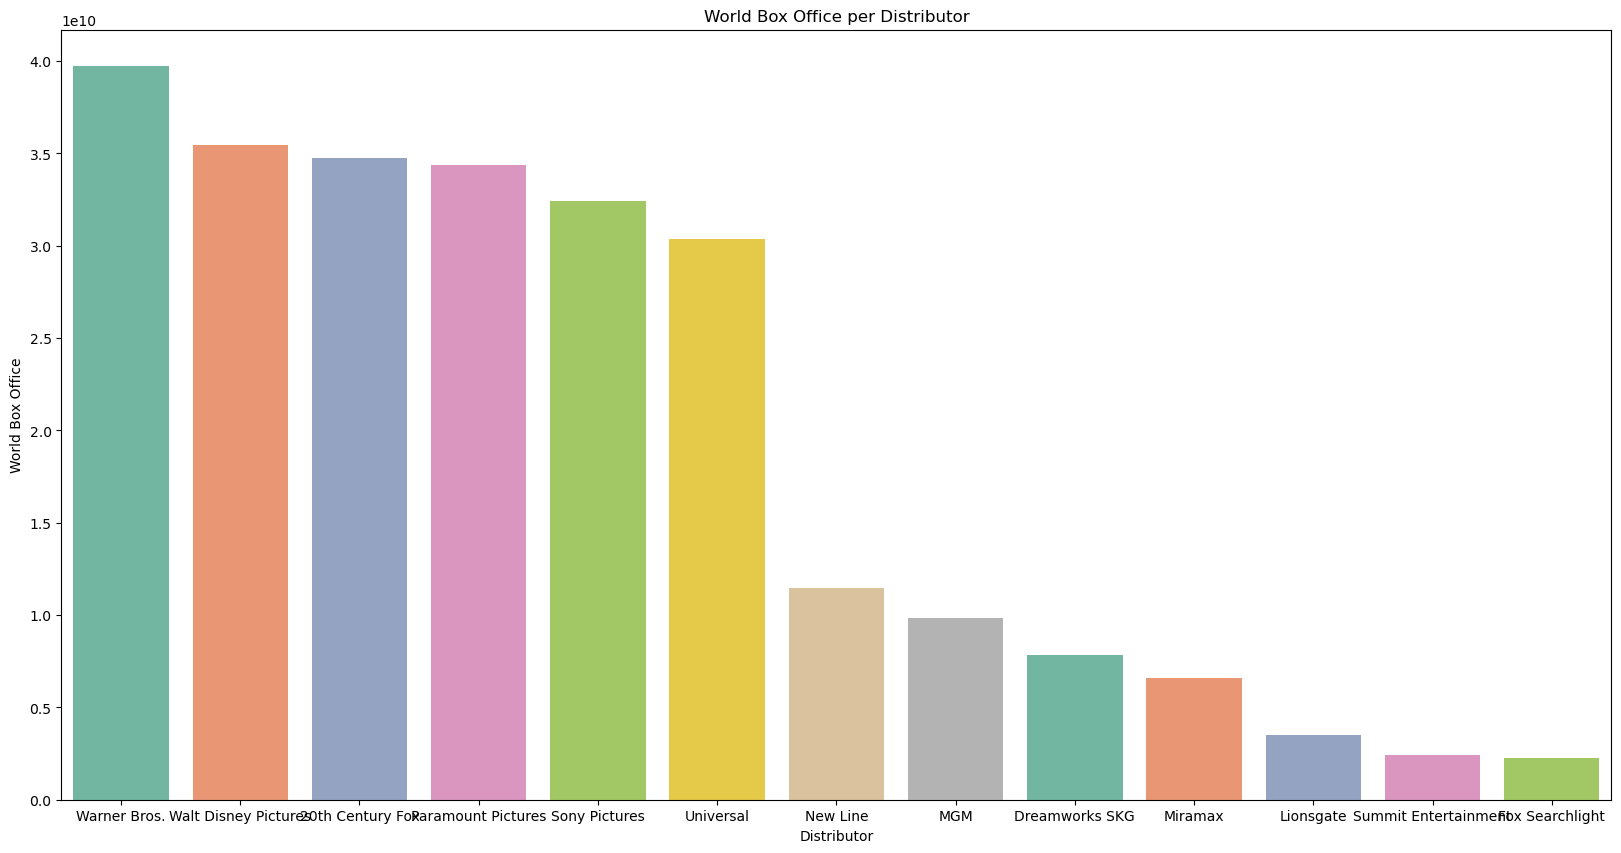

In [6]:
#plot to show World Box Office acc to distributor companies
#I included a threshold value for sales value otherwise plot is impossible to read

dist_sales=movies_data.groupby('Distributor')['Worldwide_Gross'].sum().reset_index()
dist_threshold=2000000000
dist_sales=dist_sales[dist_sales['Worldwide_Gross']>dist_threshold]
dist_sales=dist_sales.sort_values(by='Worldwide_Gross', ascending=False)
plt.figure(figsize=(20,10))
sns.barplot(x='Distributor', y='Worldwide_Gross', data=dist_sales, palette='Set2')
plt.title('World Box Office per Distributor')
plt.xlabel('Distributor')
plt.ylabel('World Box Office')
plt.show

/var/folders/gh/tx1mhxb93m56yvmy9qknq1wr0000gn/T/ipykernel_62278/4282444979.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Distributor', y='Production_Budget', data=dist_budget, palette='Set2')


<function matplotlib.pyplot.show(close=None, block=None)>

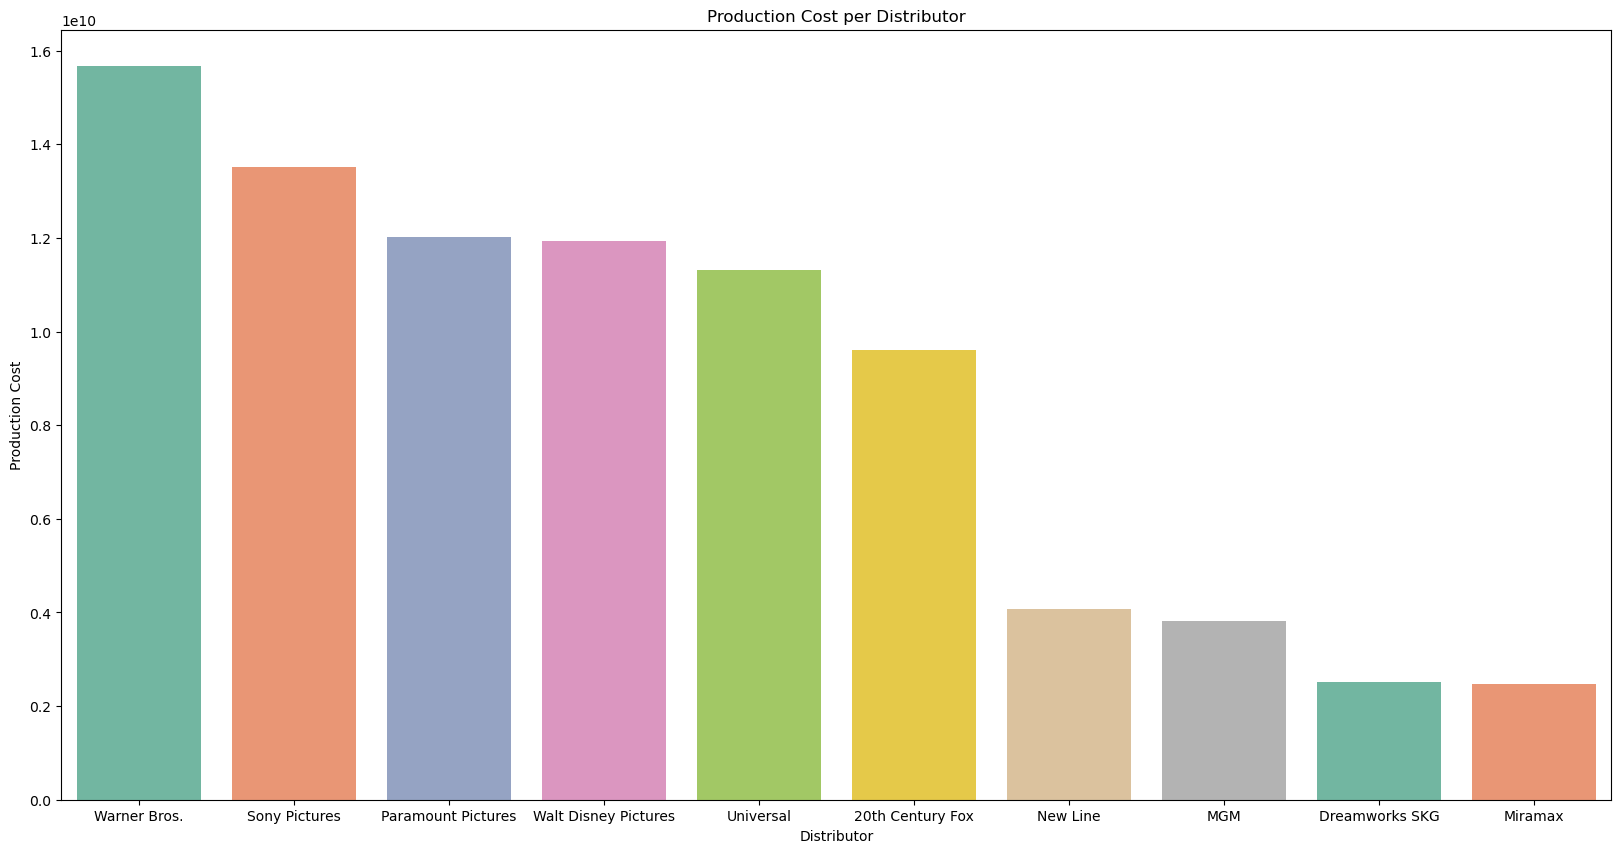

In [7]:
#plot to show Production Budget acc to distributor companies
#I included a threshold value for budget value otherwise plot is impossible to read

dist_budget=movies_data.groupby('Distributor')['Production_Budget'].sum().reset_index()
dist_budget_threshold=2000000000
dist_budget=dist_budget[dist_budget['Production_Budget']>dist_budget_threshold]
dist_budget=dist_budget.sort_values(by='Production_Budget', ascending=False)
plt.figure(figsize=(20,10))
sns.barplot(x='Distributor', y='Production_Budget', data=dist_budget, palette='Set2')
plt.title('Production Cost per Distributor')
plt.xlabel('Distributor')
plt.ylabel('Production Cost')
plt.show

In [8]:
#drop non-numeric columns for correlation matrix
movies_data_numeric=movies_data.drop(columns=movies_data.select_dtypes(exclude=[float, int]).columns)
movies_data_numeric.head()

,US_Gross,Worldwide_Gross,US_DVD_Sales,Production_Budget,Running_Time_min,Rotten_Tomatoes_Rating,IMDB_Rating,IMDB_Votes
0,146083.0,146083.0,NaN,8000000.0,NaN,NaN,6.1,1071.0
1,10876.0,10876.0,NaN,300000.0,NaN,NaN,6.9,207.0
2,203134.0,203134.0,NaN,250000.0,NaN,NaN,6.8,865.0
3,373615.0,373615.0,NaN,300000.0,NaN,13.0,NaN,NaN
4,1009819.0,1087521.0,NaN,1000000.0,NaN,62.0,3.4,165.0


In [9]:
#prepare corr matrix
movies_data_numeric_corr_matrix=movies_data_numeric.corr()
movies_data_numeric_corr_matrix

,US_Gross,Worldwide_Gross,US_DVD_Sales,Production_Budget,Running_Time_min,Rotten_Tomatoes_Rating,IMDB_Rating,IMDB_Votes
US_Gross,1.000000,0.939742,0.740876,0.623566,0.261973,0.179158,0.197037,0.552514
Worldwide_Gross,0.939742,1.000000,0.702271,0.665780,0.317640,0.159326,0.197521,0.551564
US_DVD_Sales,0.740876,0.702271,1.000000,0.592022,0.276087,0.212593,0.209237,0.511408
Production_Budget,0.623566,0.665780,0.592022,1.000000,0.348830,-0.088740,0.015312,0.339755
Running_Time_min,0.261973,0.317640,0.276087,0.348830,1.000000,0.295653,0.387499,0.404181
Rotten_Tomatoes_Rating,0.179158,0.159326,0.212593,-0.088740,0.295653,1.000000,0.743118,0.335410
IMDB_Rating,0.197037,0.197521,0.209237,0.015312,0.387499,0.743118,1.000000,0.467389
IMDB_Votes,0.552514,0.551564,0.511408,0.339755,0.404181,0.335410,0.467389,1.000000


Text(0.5, 1.0, 'Heatmap Correlation Matrix')

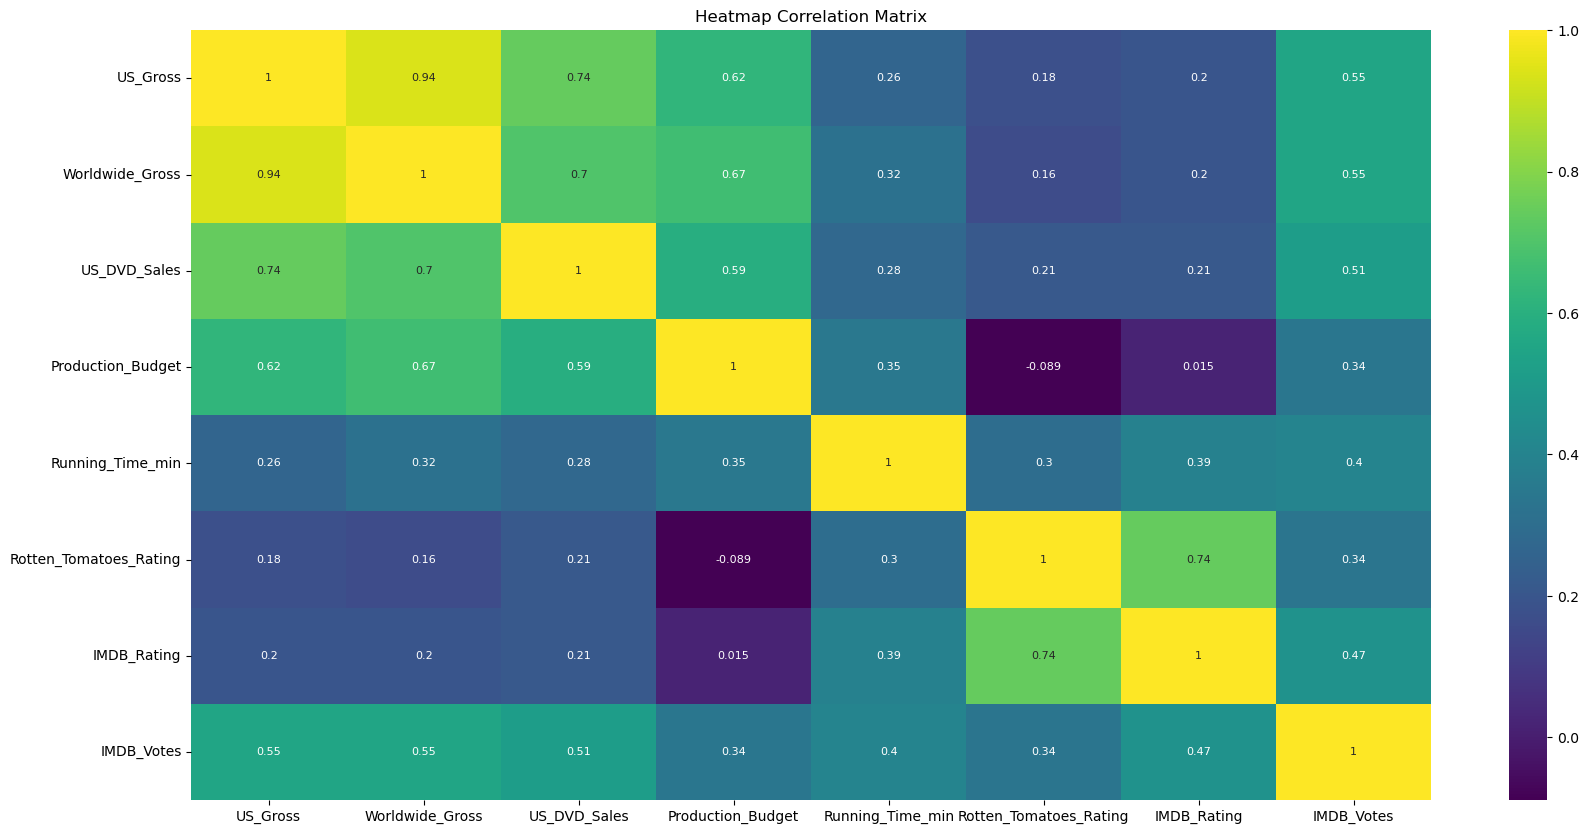

In [10]:
#plot the heatmap - change colours
plt.figure(figsize=(20, 10))
sns.heatmap(movies_data_numeric_corr_matrix, annot=True, annot_kws={'size': 8}, cmap='viridis')
plt.title('Heatmap Correlation Matrix', loc='center')

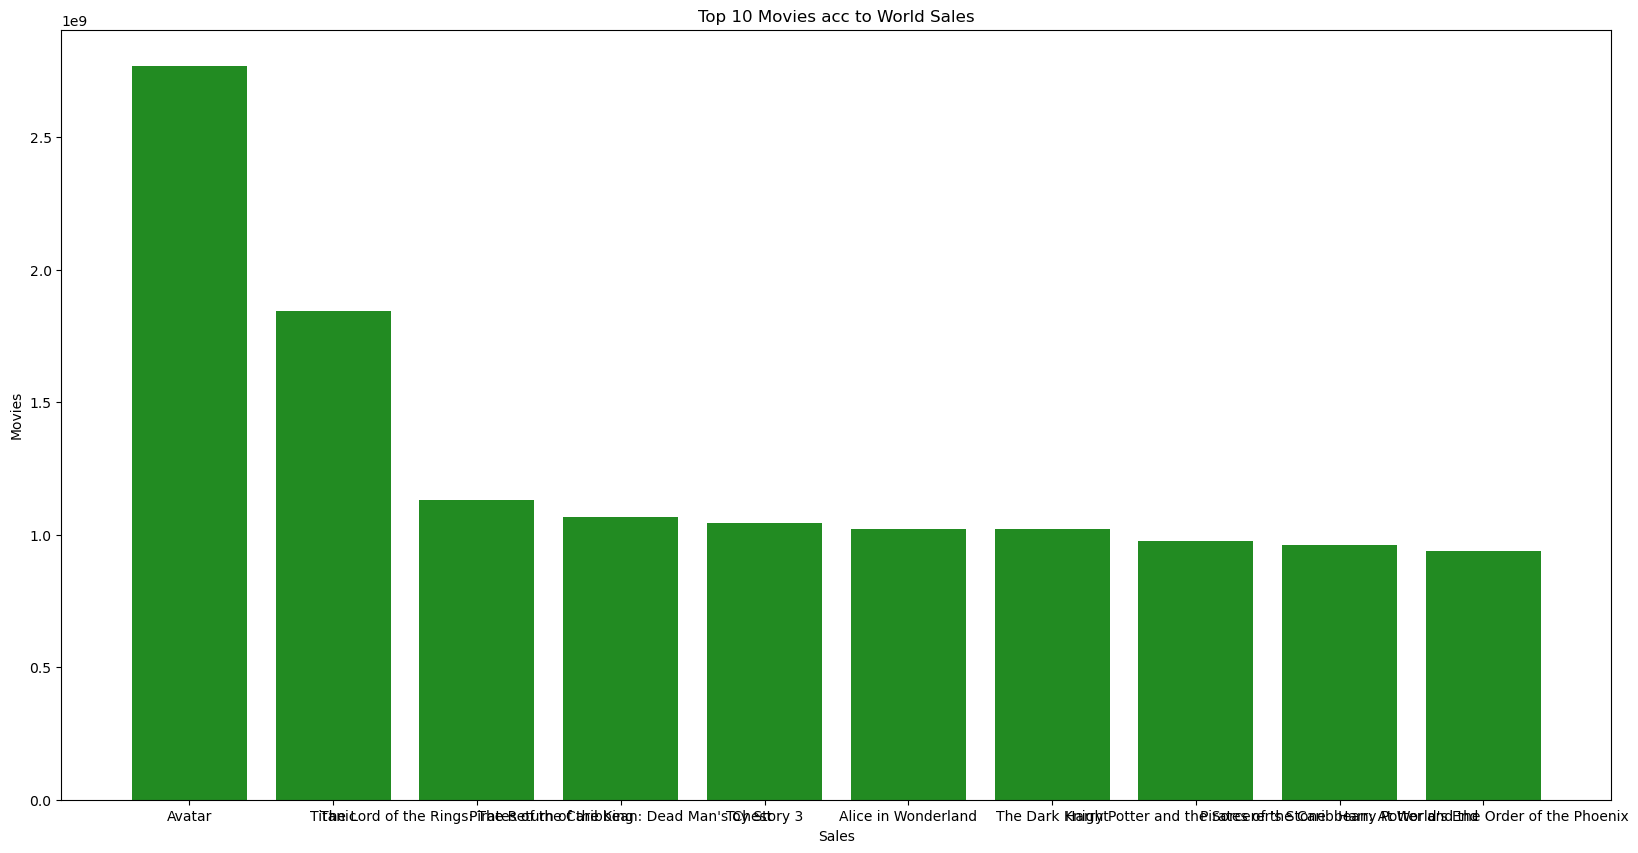

In [22]:
#plot top10 movie titles acc to Sales
plt.figure(figsize=(20,10))

movies_data_top10=movies_data.sort_values(by='Worldwide_Gross', ascending=False).head(10)
x=movies_data_top10['Title'].astype(str)
y=movies_data_top10['Worldwide_Gross']

#to make horizontal bar chart, use barh

plt.bar(x, y, alpha=1, linewidth=0, color= 'forestgreen', edgecolor='black')

plt.xlabel('Sales')
plt.ylabel('Movies')
plt.title('Top 10 Movies acc to World Sales')
plt.show()

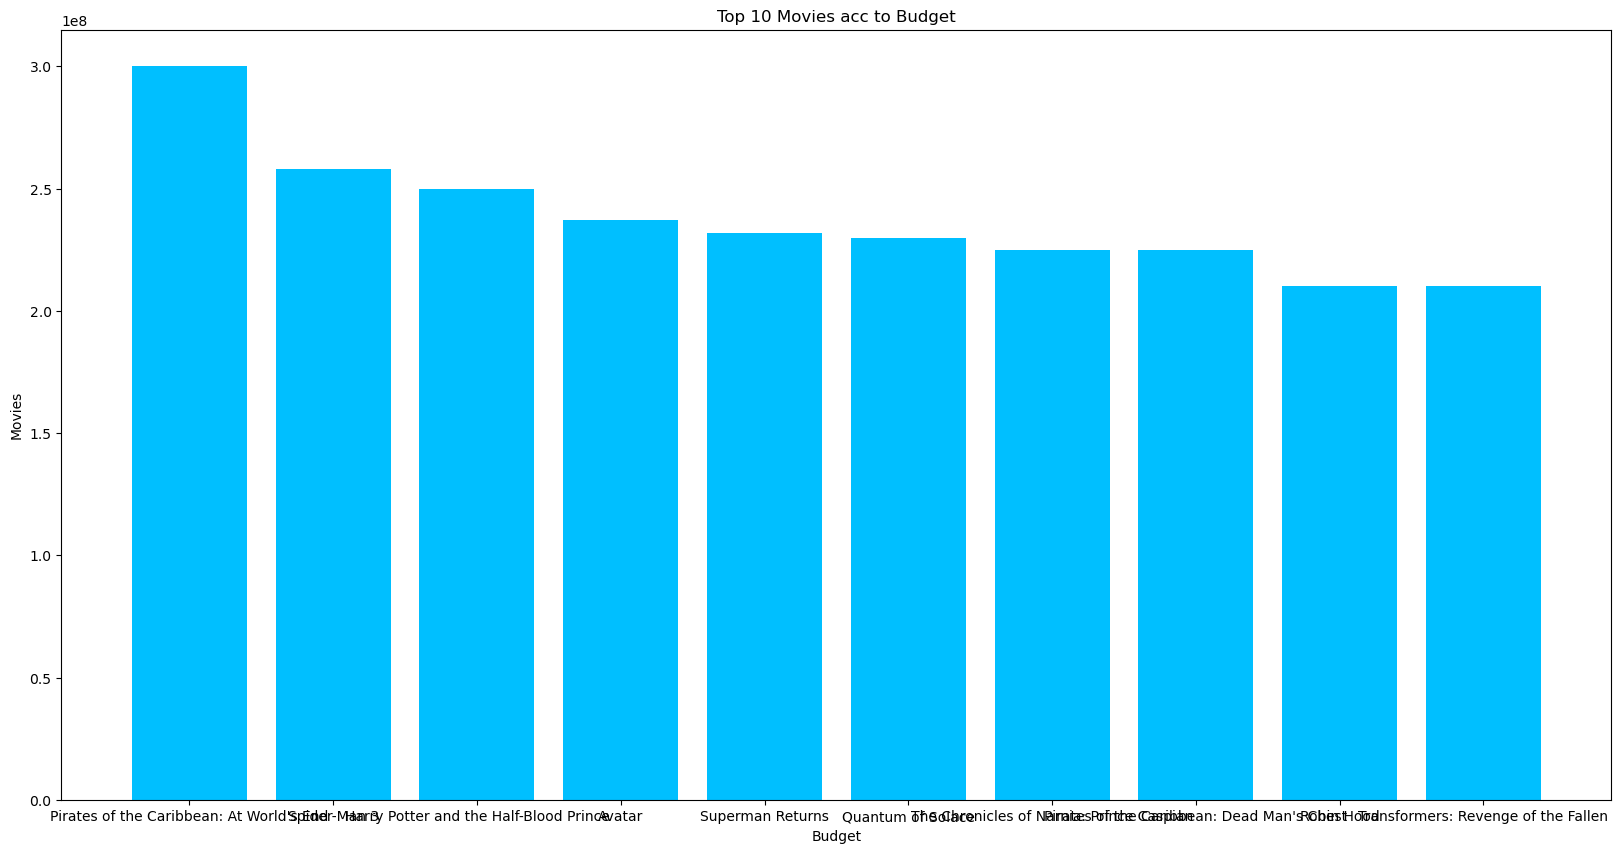

In [18]:
#plot top10 movie titles acc to Production Budget
plt.figure(figsize=(20,10))

movies_data_top10=movies_data.sort_values(by='Production_Budget', ascending=False).head(10)
x=movies_data_top10['Title'].astype(str)
y=movies_data_top10['Production_Budget']

#to make horizontal bar chart, use barh

plt.bar(x, y, alpha=1, linewidth=0, color= 'deepskyblue', edgecolor='black')

plt.xlabel('Budget')
plt.ylabel('Movies')
plt.title('Top 10 Movies acc to Budget')
plt.show()

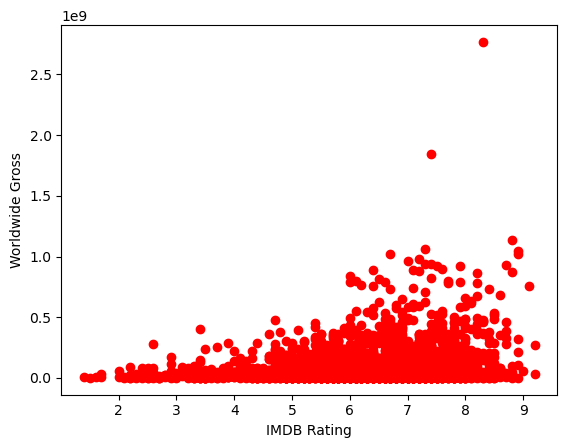

In [23]:
plt.scatter(movies_data.IMDB_Rating, movies_data.Worldwide_Gross, color='Red')
plt.xlabel('IMDB Rating')
plt.ylabel('Worldwide Gross')
plt.show()